1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as la
import pandas as pd
import seaborn as sns

matrice di covarianza:
 [[ 0.94528883  0.99580716  2.88638481]
 [ 0.99580716  9.81512016 11.80673448]
 [ 2.88638481 11.80673448 17.5795041 ]] 

autovalori e autovettori:
 [ 2.64609581e+01+0.j -7.28837499e-16+0.j  1.87895498e+00+0.j] 
 [[-0.11391125 -0.81649658  0.56600138]
 [-0.57929603 -0.40824829 -0.7055136 ]
 [-0.80711854  0.40824829  0.42648916]] 

autovalori e autovettori:
 [26.46095811  1.87895498 -0.        ] 

[[-0.11391125  0.56600138 -0.81649658]
 [-0.57929603 -0.7055136  -0.40824829]
 [-0.80711854  0.42648916  0.40824829]] 

percent of the total variability: 0.933699338571113
all variability: [ 0.93369934  0.06630066 -0.        ] 



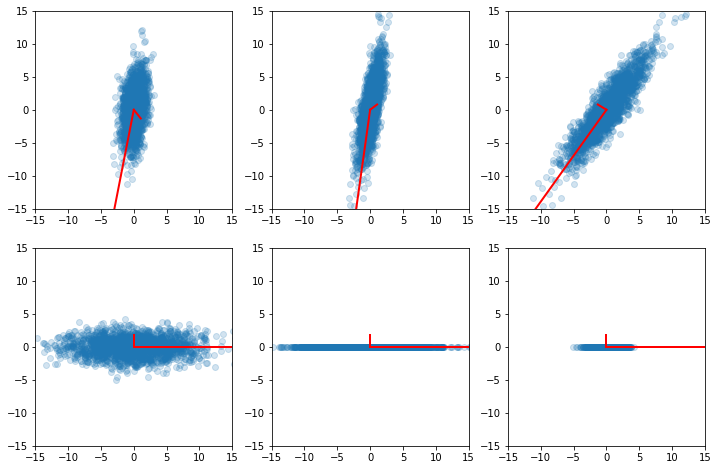

In [45]:

x1=np.random.normal(size=2000)
x2=x1+np.random.normal(scale=3,size=2000)
x3=2*x1+x2

df = pd.DataFrame(  #faccio dataframe da dizionario con le tre colonne ma dopo non lo uso
    { 'x1' : x1,
      'x2' : x2,
      'x3' : x3,
    }
    )

x=np.array([x1,x2,x3])    #faccio l'array con i dati

cov=np.cov(df.T)
print('matrice di covarianza:\n',cov,'\n')

l, V = la.eig(cov)
print('autovalori e autovettori:\n',l,'\n',V,'\n')

U, spectrum, Vt = la.svd(cov)

print ('autovalori e autovettori:\n',spectrum,'\n')   
print (U,'\n')   #nel caso in cui la matrice è quadrata U e Vt sono l'una la trasposta dell'altra

#print(np.allclose(V, Vt))

xnew= np.dot(Vt, df.T)  #ruoto tutti i dati per ottenere una colonna di valori quasi nulli corrispondenti al terzo autovalore della matrice di covarianza

print('percent of the total variability:', spectrum[0]/spectrum.sum())   #autovalori sono in ordine decrescente da SVD
print('all variability:', spectrum/spectrum.sum(),'\n')

i=0
while (spectrum.sum()-np.sum(spectrum[:i]))/spectrum.sum()>0.01:
    i+=1
spectrum[i:]=0       


xnew1=xnew[0:i,:] #elimino la terza colonna dell'array ossia con valori quasi nulli

df1=pd.DataFrame(xnew1)

#sns.pairplot(df1)
#newcov=U.dot(lamda.dot(Vt))
#print('nuova matrice di covarianza:\n',newcov)

gridsize = (2, 3)
fig = plt.figure(figsize=(12, 8))

ax00 = plt.subplot2grid(gridsize, (0, 0))  
ax01 = plt.subplot2grid(gridsize, (0, 1))
ax02 = plt.subplot2grid(gridsize, (0, 2))
ax10 = plt.subplot2grid(gridsize, (1, 0))
ax11 = plt.subplot2grid(gridsize, (1, 1))
ax12 = plt.subplot2grid(gridsize, (1, 2))


ax00.scatter(x[0,:], x[1,:], alpha=0.2)
ax00.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[1][0]], 'r-', lw=2)
ax00.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[1][1]], 'r-', lw=2)
ax00.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[1][2]], 'r-', lw=2)
ax00.axis([-15,15,-15,15]);
    
ax01.scatter(x[0,:], x[2,:], alpha=0.2)
ax01.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax01.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax01.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax01.axis([-15,15,-15,15]);
    
ax02.scatter(x[1,:], x[2,:], alpha=0.2)
ax02.plot([0, spectrum[1]*U[1][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax02.plot([0, spectrum[2]*U[1][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax02.plot([0, spectrum[0]*U[1][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax02.axis([-15,15,-15,15]);    
    
ax10.scatter(xnew[0,:], xnew[1,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax10.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax10.axis([-15,15,-15,15]);

ax11.scatter(xnew[0,:], xnew[2,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax11.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax11.axis([-15,15,-15,15]);

ax12.scatter(xnew[1,:], xnew[2,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax12.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax12.axis([-15,15,-15,15]);



2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

matrice di covarianza:
 [[ 0.99116426  1.01323178  2.96696733]
 [ 1.01323178  9.75948447 11.73625943]
 [ 2.96696733 11.73625943 17.61582209]] 

autovalori e autovettori:
 [2.64182514e+01+0.j 8.71264860e-03+0.j 1.93950676e+00+0.j] 
 [[-0.11731868 -0.81588227  0.56619118]
 [-0.57671555 -0.4081684  -0.70767063]
 [-0.80847727  0.40955424  0.42264622]] 

autovalori e autovettori:
 [2.64182514e+01 1.93950676e+00 8.71264860e-03] 

[[-0.11731868  0.56619118 -0.81588227]
 [-0.57671555 -0.70767063 -0.4081684 ]
 [-0.80847727  0.42264622  0.40955424]] 

percent of the total variability: 0.9313196407557511
all variability: [9.31319641e-01 6.83732132e-02 3.07146020e-04] 



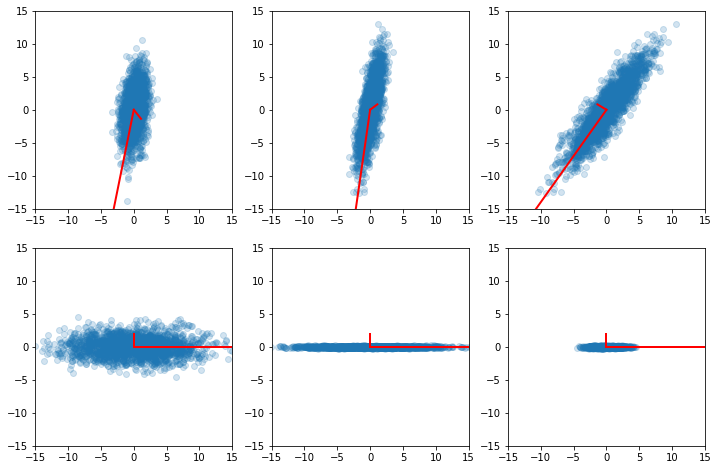

In [33]:
x10=np.random.normal(scale=1/50, size=(2000,10))
x10n=x10.sum(axis=1)
x1=x1+x10n
x2=x2+x10n
x3=x3+x10n
df = pd.DataFrame(  #faccio dataframe da dizionario con le tre colonne ma dopo non lo uso
    { 'x1' : x1,
      'x2' : x2,
      'x3' : x3,
    }
    )


x=np.array([x1,x2,x3])    #faccio l'array con i dati

cov=np.cov(df.T)
print('matrice di covarianza:\n',cov,'\n')

l, V = la.eig(cov)
print('autovalori e autovettori:\n',l,'\n',V,'\n')

U, spectrum, Vt = la.svd(cov)

print ('autovalori e autovettori:\n',spectrum,'\n')   
print (U,'\n')   #nel caso in cui la matrice è quadrata U e Vt sono l'una la trasposta dell'altra

#print(np.allclose(V, Vt))

xnew= np.dot(Vt, df.T)  #ruoto tutti i dati per ottenere una colonna di valori quasi nulli corrispondenti al terzo autovalore della matrice di covarianza

print('percent of the total variability:', spectrum[0]/spectrum.sum())   #autovalori sono in ordine decrescente da SVD
print('all variability:', spectrum/spectrum.sum(),'\n')

i=0
while (spectrum.sum()-spectrum[i])/spectrum.sum()<0.99:
    i+=1
spectrum[i:]=0       


xnew1=xnew[0:i,:] #elimino la terza colonna dell'array ossia con valori quasi nulli

df1=pd.DataFrame(xnew1)

#sns.pairplot(df1)
#newcov=U.dot(lamda.dot(Vt))
#print('nuova matrice di covarianza:\n',newcov)

gridsize = (2, 3)
fig = plt.figure(figsize=(12, 8))

ax00 = plt.subplot2grid(gridsize, (0, 0))  
ax01 = plt.subplot2grid(gridsize, (0, 1))
ax02 = plt.subplot2grid(gridsize, (0, 2))
ax10 = plt.subplot2grid(gridsize, (1, 0))
ax11 = plt.subplot2grid(gridsize, (1, 1))
ax12 = plt.subplot2grid(gridsize, (1, 2))


ax00.scatter(x[0,:], x[1,:], alpha=0.2)
ax00.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[1][0]], 'r-', lw=2)
ax00.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[1][1]], 'r-', lw=2)
ax00.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[1][2]], 'r-', lw=2)
ax00.axis([-15,15,-15,15]);
    
ax01.scatter(x[0,:], x[2,:], alpha=0.2)
ax01.plot([0, spectrum[0]*U[0][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax01.plot([0, spectrum[1]*U[0][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax01.plot([0, spectrum[2]*U[0][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax01.axis([-15,15,-15,15]);
    
ax02.scatter(x[1,:], x[2,:], alpha=0.2)
ax02.plot([0, spectrum[1]*U[1][1]], [0, spectrum[1]*U[2][1]], 'r-', lw=2)
ax02.plot([0, spectrum[2]*U[1][2]], [0, spectrum[2]*U[2][2]], 'r-', lw=2)
ax02.plot([0, spectrum[0]*U[1][0]], [0, spectrum[0]*U[2][0]], 'r-', lw=2)
ax02.axis([-15,15,-15,15]);    
    
ax10.scatter(xnew[0,:], xnew[1,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax10.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax10.axis([-15,15,-15,15]);

ax11.scatter(xnew[0,:], xnew[2,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax11.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax11.axis([-15,15,-15,15]);

ax12.scatter(xnew[1,:], xnew[2,:], alpha=0.2)
for li, vi in zip(spectrum, np.diag([1]*2)):
    ax12.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax12.axis([-15,15,-15,15]);


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


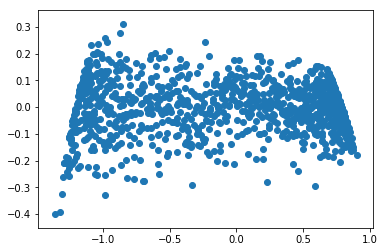

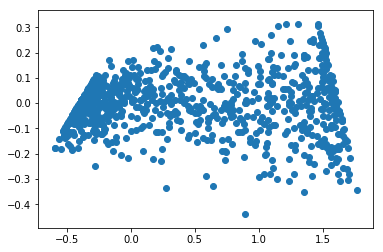

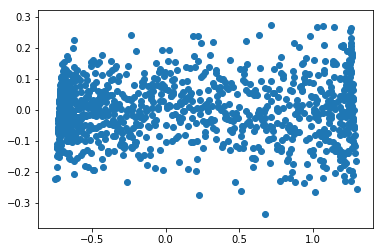

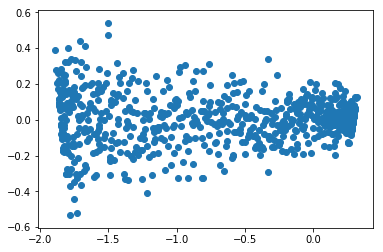

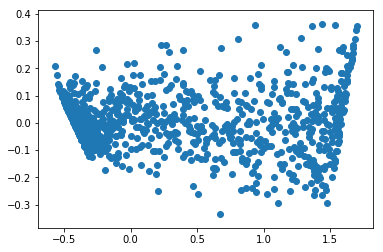

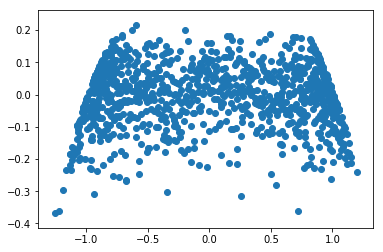

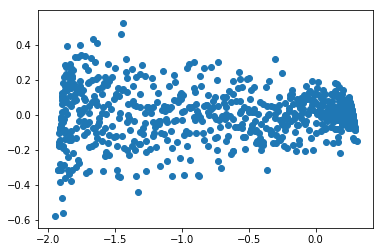

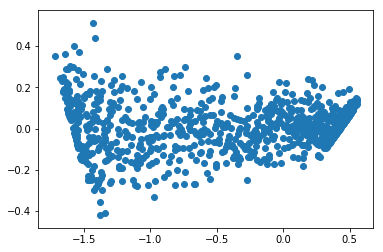

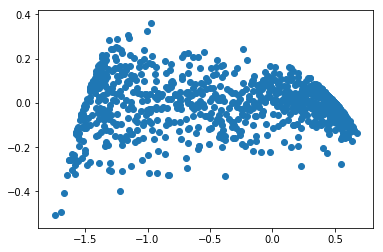

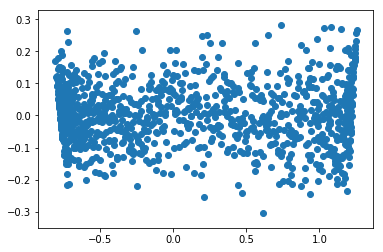

In [13]:

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    phi=np.arccos(vec[2])
    theta =np.arccos(vec[0]/np.sin(phi))   #non mi servono le  theta e phi bensì le coordinate
    return vec
cameras=np.array(sample_spherical(10)).T

x= np.linspace(0,2*np.pi,1000)
spring_x=np.array(np.cos(x))

spring_motion=np.array([spring_x, np.random.normal(loc=0,scale=0.1,size=1000), np.zeros(1000)])
spring_motion=spring_motion.T

dati=np.zeros(shape=(1000,3,10))
for i in range(len(cameras)):
    for vec in range(len(spring_motion)):
        for comp in range(len(spring_motion[vec])):
            dati[vec][comp][i]=spring_motion[vec][comp]-np.dot(cameras[i],spring_motion[vec])*spring_motion[vec][comp]
#faccio la proiezione

for c in range(len(cameras)):
    cov=np.cov(dati[:,:,c].T)
    U, spectrum, Vt = la.svd(cov)
    datinew= np.dot(Vt,dati[:,:,c].T)

    i=0
    while (spectrum.sum()-np.sum(spectrum[:i]))/spectrum.sum()>0.01:
        i+=1
    spectrum[i:]=0 
    datinew=datinew[0:i,:]
    
    plt.scatter(datinew[0,:],datinew[1,:])
    plt.show()


  #ruoto tutti i dati per ottenere una colonna di valori quasi nulli corrispondenti al terzo autovalore della matrice di covarianza


      

 #elimino la terza colonna dell'array ossia con valori quasi nulli


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [27]:
file_name="/Users/marco/Desktop/laboratorio fisica computazionale/data/magic04.data.txt"
data=pd.read_csv(file_name)

data=data.drop(['g'], axis=1)
cov=np.cov(data.T)
U, spectrum, Vt = la.svd(cov)
print ('autovalori e autovettori:\n',spectrum,'\n')  
xnew= np.dot(Vt, data.T)

i=0
while (spectrum.sum()-spectrum[i])/spectrum.sum()<0.99:
    i+=1
spectrum[i:]=0       


xnew1=xnew[0:i,:]
data1=pd.DataFrame(xnew1)
data1.T

autovalori e autovettori:
 [6.57940709e+03 3.85406143e+03 2.01648128e+03 1.32681867e+03
 6.10218593e+02 4.33618554e+02 1.17335954e+02 8.64007193e-02
 1.07368268e-02 3.85330787e-04] 



,0,1,2,3,4,5
0,-174.584036,109.897345,33.990587,7.504008,27.851736,-11.068800
1,-243.437570,111.288711,162.330205,-158.003704,84.033056,-48.767946
2,-97.931136,58.006821,42.246046,-4.308835,20.074110,-8.226268
3,-331.894267,145.569115,40.850410,7.847066,39.157183,20.134795
4,-199.670989,148.390822,37.029010,-13.543814,29.244980,8.412757
5,-198.337703,108.920797,14.764815,-1.561086,27.878744,9.535092
6,-199.688780,124.547436,45.028146,18.244721,26.024232,-4.000153
7,-200.220580,209.810315,35.169803,-78.468021,32.756056,41.305591
8,-91.213881,75.623084,-4.420127,-32.233976,19.074190,-7.477767
9,-307.733796,129.665626,-3.623272,16.366405,44.763831,22.870017
